# Demonstration of grid search to compare classifier performance

An important step in classifier performance comparison is hyperparameter 
optimization. Here, we specify the classifer models we want to tune and a 
dictionary of hyperparameter ranges (preferably similar for fairness in 
comparision) for each classifier. Then, we find the optimal hyperparameters 
through a function that uses GridSearchCV and refit the optimized 
models to obtain accuracies. 

In this example, we tune hyperparameters for two classifiers, Random Forest and Extra Trees, and compare their performance on an OpenML-CC18 benchmarking suite dataset (https://www.openml.org/d/15).  We can see clearly in the resulting plot that the optimized models perform better than or atleast similar to the default parameter models. On the dataset we use in this example, RF performs marginally better than ExtraTrees overall.


In [9]:
print(__doc__)

import pandas as pd
import numpy as np

import sklearn
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score

import matplotlib
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)
from warnings import simplefilter
simplefilter(action="ignore", category=FutureWarning)

Automatically created module for IPython interactive environment


# Building classifiers and specifying parameter ranges to sample from


In [24]:
# get some data
X, y = fetch_openml(data_id=40979, return_X_y=True, as_frame=True) #breast-w dataset: 15
y = pd.factorize(y)[0]
X = X.apply(lambda x: pd.factorize(x)[0])
n_samples, n_features = np.shape(X)

# specify parameters and distributions to sample from
extraTrees_param_dict = {
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10,30,50,70],
}

# specify parameters and distributions to sample from
rf_param_dict = {
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10,30,50,70],
}

In [ ]:
def hyperparameter_optimization_grid(X, y, *argv):
    clf_best_params = {}
    # Iterate over all (classifier, hyperparameters) pairs
    for clf, params in argv:
        param1_name = list(params.keys())[0]
        param2_name = list(params.keys())[j+1]
        param1 = params[param1_name]
        param2 = params[param2_name]
        for val in param1:
            extraTrees = ExtraTreesClassifier(warm_start=True)


# build another classifier
rf = RandomForestClassifier(warm_start=True)

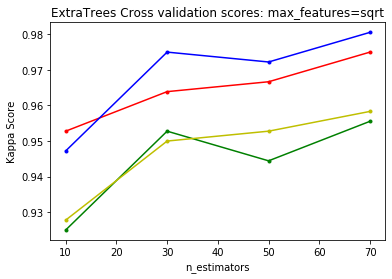

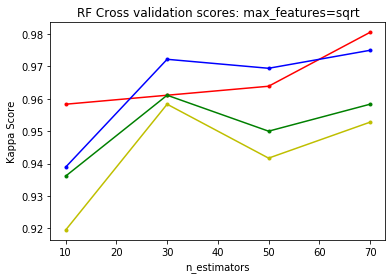

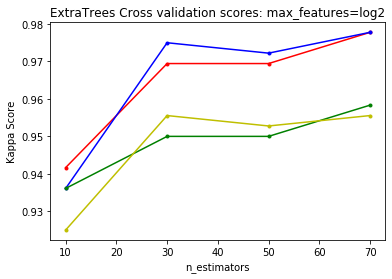

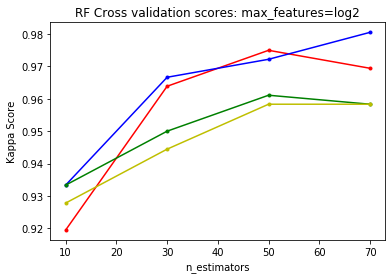

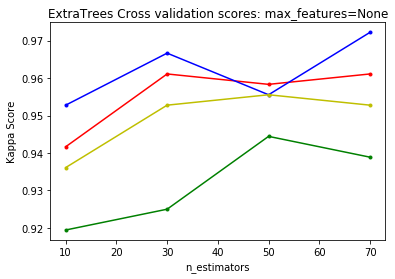

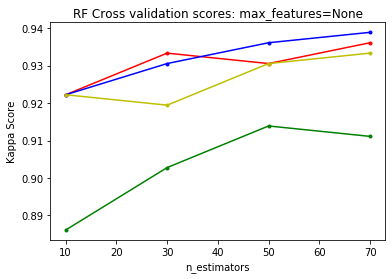

[[0.94111111 0.96277778 0.96111111 0.96888889]
 [0.935      0.96222222 0.965      0.96777778]
 [0.94       0.95166667 0.95388889 0.95722222]]
[[0.94055556 0.96277778 0.95777778 0.96611111]
 [0.92888889 0.95833333 0.96833333 0.96722222]
 [0.92       0.92833333 0.93166667 0.93388889]]


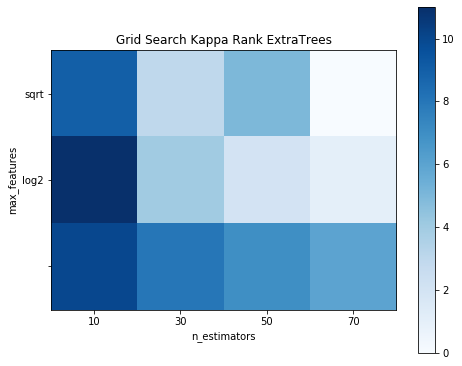

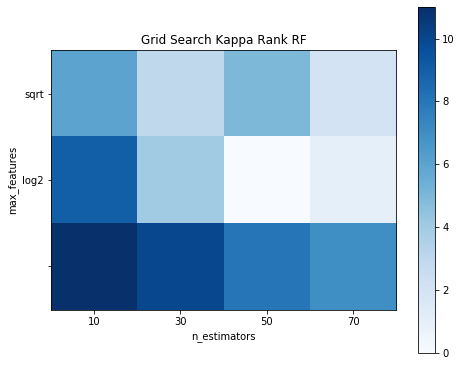

In [25]:
param1_name = list(extraTrees_param_dict.keys())[0]
param2_name = list(extraTrees_param_dict.keys())[1]
param1 = extraTrees_param_dict[param1_name]
param2 = extraTrees_param_dict[param2_name]

kappa_scorer = make_scorer(cohen_kappa_score)

extraTrees_scores = np.zeros((3,4))
rf_scores = np.zeros((3,4))
for idx1, val1 in enumerate(param1):
    extraTrees_cv = []
    rf_cv = []
    extraTrees = ExtraTreesClassifier(n_estimators=1, max_features=val1, warm_start=True)
    rf = RandomForestClassifier(n_estimators=1, max_features=val1, warm_start=True)
    for idx2, val2 in enumerate(param2):
        extraTrees.n_estimators = val2
        extraTrees_score = cross_val_score(extraTrees, X, y, scoring=kappa_scorer, cv=5)
        extraTrees_scores[idx1][idx2] = np.mean(extraTrees_score)
        extraTrees_cv.append(extraTrees_score)
        
        rf.n_estimators = val2
        rf_score = cross_val_score(rf, X, y, scoring=kappa_scorer, cv=5)
        rf_scores[idx1][idx2] = np.mean(rf_score)
        rf_cv.append(rf_score)
         
        
    extraTrees_cv_T = np.transpose(extraTrees_cv)  
    plt.plot(param2, extraTrees_cv_T[0], '-r.', 
        param2, extraTrees_cv_T[1], '-b.',
        param2, extraTrees_cv_T[2], '-g.',
        param2, extraTrees_cv_T[3], '-y.'
        )
    plt.ylabel('Kappa Score')
    plt.xlabel('n_estimators')
    plt.title('ExtraTrees Cross validation scores: max_features=' + str(val1))
    plt.show()
    
    rf_cv_T = np.transpose(rf_cv)  
    plt.plot(param2, rf_cv_T[0], '-r.', 
        param2, rf_cv_T[1], '-b.',
        param2, rf_cv_T[2], '-g.',
        param2, rf_cv_T[3], '-y.'
        )
    plt.ylabel('Kappa Score')
    plt.xlabel('n_estimators')
    plt.title('RF Cross validation scores: max_features=' + str(val1))
    plt.show()

print(extraTrees_scores)
print(rf_scores)

a = -np.array(extraTrees_scores)
a = a.ravel().argsort().argsort().reshape(a.shape)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(a, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel(param2_name)
plt.ylabel(param1_name)
plt.colorbar()
plt.xticks(np.arange(len(param2)), param2)
plt.yticks(np.arange(len(param1)), param1)
plt.title('Grid Search Kappa Rank ' + 'ExtraTrees')
plt.show()

b = -np.array(rf_scores)
b = b.ravel().argsort().argsort().reshape(b.shape)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(b, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel(param2_name)
plt.ylabel(param1_name)
plt.colorbar()
plt.xticks(np.arange(len(param2)), param2)
plt.yticks(np.arange(len(param1)), param1)
plt.title('Grid Search Kappa Rank ' + 'RF')
plt.show()
        

# Obtaining best parameters dictionary and refitting

In [10]:
best_params = hyperparameter_optimization_grid(
    X, y, (extraTrees, extraTrees_param_dict), (rf, rf_param_dict)
)

print(best_params)

# extract values from dict - seperate each classifier's param dict
keys, values = zip(*best_params.items())

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

NameError: name 'use_warm_start' is not defined

In [13]:
def get_accuracy(model, X_train, y_train, X_test, y_test):
    """
    Given a model, train, and test data, 
    fit model and calculate accuracy of predictions.

    Parameters
    ----------
    model : sklearn-compliant classifier
    X_train : numpy.ndarray
        Train input data, shape (n_samples, n_features)
    y_train  numpy.ndarray
        Train output data, shape (n_samples, n_outputs)
    X_test: numpy.ndarray
        Test input data, shape (n_samples, n_features)
    y_test:numpy.ndarray
        Test output data, shape (n_samples, n_outputs)

    Returns
    -------
    accuracy : float
        An sklearn metric for model performance.
    """
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    return accuracy

# get accuracies of optimized and default models
extraTrees_models = [ExtraTreesClassifier(**values[0]), ExtraTreesClassifier()]
extraTrees_acc = []
for model in extraTrees_models:
    extraTrees_acc.append(get_accuracy(
        model, X_train, y_train, X_test, y_test))

rf_models = [RandomForestClassifier(**values[1]), RandomForestClassifier()]
rf_acc = []
for model in rf_models:
    rf_acc.append(get_accuracy(
        model, X_train, y_train, X_test, y_test))
print(extraTrees_acc)
print(rf_acc)

[0.8100558659217877, 0.8324022346368715]
[0.7932960893854749, 0.8100558659217877]


# Plotting the result

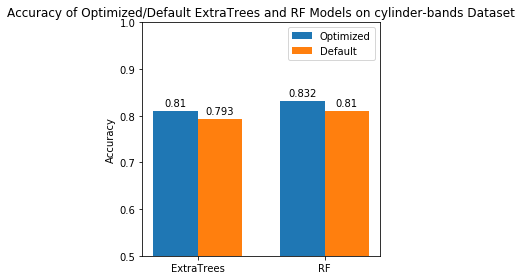

In [14]:
labels = ["ExtraTrees", "RF"]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, extraTrees_acc, width, label="Optimized")
rects2 = ax.bar(x + width / 2, rf_acc, width, label="Default")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy")
ax.set_title(
    "Accuracy of Optimized/Default ExtraTrees and RF Models on cylinder-bands Dataset")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = float("%.3f" % (rect.get_height()))
        ax.annotate(
            "{}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.ylim((0.5, 1))
plt.show()

In [10]:
print('matplotlib: {}'.format(matplotlib.__version__))

The scikit-learn version is 0.22.1.


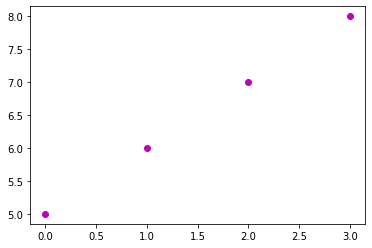

In [17]:
xrange = [0,1,2,3]
nums = [5,6,7,8]
plt.plot(xrange, nums, 'mo')
plt.show()